<h2> Importing the Dependencies </h2>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<h2> Data Collectoin & Analysis </h2>

In [2]:
# Loading the data from the csv file to a Pandas DataFrame
customer_data = pd.read_csv('C:/Users/hakim/OneDrive/Bureau/ENSI/ML Projects/Customers Segmentation using K-Means Clustering/Mall_customers.csv')


In [4]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h2> Choosing the Annual income Column & Spending column

In [15]:
X = customer_data.iloc[:,[3,4]].values

<h2> Choosing the number of clusters </h2>

<h5> WCSS -> Within Clusters Sum of Squares </h5>

In [17]:
# Finding wcss value for different number of clusters 

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

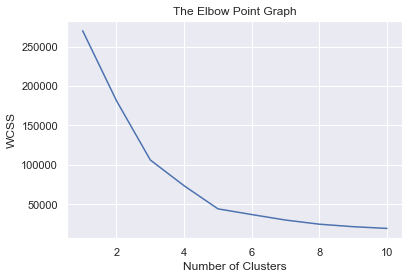

In [18]:
# Plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show

<b> Optimum Number of Clusters = 5 </b>

<h4> Training the K-Means Clustering Model </h4>

In [22]:
kmeans = KMeans(n_clusters = 5, init='k-means++',random_state = 0)

# Return a label for each data point based on their  cluster
Y = kmeans.fit_predict(X)
print(Y)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


<h3> Visualizing all the Clusters </h3>

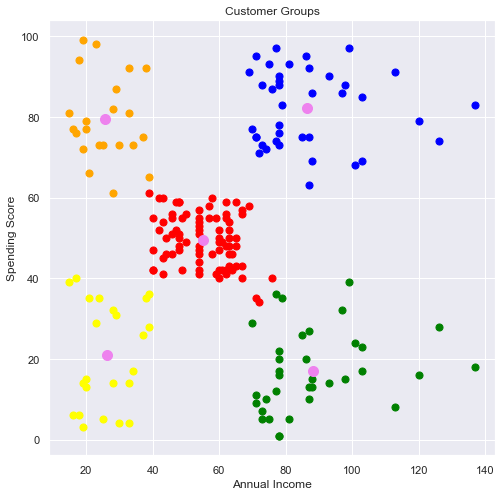

In [31]:
# Plotting all the clusters and their Centroids 

plt.figure(figsize=(8,8))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s =50, c='green', label='Cluster 1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s =50, c='red', label='Cluster 2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s =50, c='blue', label='Cluster 3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s =50, c='orange', label='Cluster 4')
plt.scatter(X[Y == 4, 0], X[Y == 4, 1], s =50, c='yellow', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c='violet', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()